In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
base_url = (
    "https://raw.githubusercontent.com/U1186204/Forex_Project/refs/heads/main/datasets/"
)

# Dictionary to map currencies to their respective countries
currency_country_map = {
    "AUD": "Australia",
    "BRL": "Brazil",
    "CAD": "Canada",
    "CHF": "Switzerland",
    "EUR": "Eurozone",
    "GBP": "United Kingdom",
    "HKD": "Hong Kong",
    "IDR": "Indonesia",
    "INR": "India",
    "JPY": "Japan",
    "KRW": "South Korea",
    "MXN": "Mexico",
    "SGD": "Singapore",
    "THB": "Thailand",
    "ZAR": "South Africa",
}

# Dictionary to map currencies to development status
development_status_map = {
    "MXN": "Developing",
    "INR": "Developing",
    "BRL": "Developing",
    "ZAR": "Developing",
    "THB": "Developing",
    "IDR": "Developing",
    "EUR": "Developed",
    "JPY": "Developed",
    "GBP": "Developed",
    "AUD": "Developed",
    "CAD": "Developed",
    "CHF": "Developed",
    "HKD": "Developing",
    "SGD": "Developing",
    "KRW": "Developed",
}

# Read all the files and add currency, country, and development status columns
dfs = []

for currency, country in currency_country_map.items():
    file_name = f"USD_{currency} Historical Data.csv".replace(
        " ", "%20"
    )  # Encode spaces
    file_path = base_url + file_name  # Corrected URL

    try:
        df = pd.read_csv(file_path)
        df["currency"] = currency
        df["country"] = country
        df["development_status"] = development_status_map.get(
            currency, "Unknown"
        )  # Add status
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Combine all data into a single DataFrame
df_forex = pd.concat(dfs, ignore_index=True)

In [25]:
df_forex["Change %"] = pd.to_numeric(
    df_forex["Change %"].astype(str).str.replace("%", "", regex=False), errors="coerce"
)

df_stats = df_forex.groupby("currency")["Change %"].agg(["mean", "std"]).reset_index()

df_stats.columns = ["currency", "mean_change_pct", "stddev_change_pct"]

df_forex.head(10)

,Date,Price,Open,High,Low,Vol.,Change %,currency,country,development_status
0,02/07/2025,1.5944,1.5924,1.5993,1.5874,NaN,0.19,AUD,Australia,Developed
1,02/06/2025,1.5913,1.5911,1.599,1.59,NaN,0.03,AUD,Australia,Developed
2,02/05/2025,1.5908,1.6,1.6027,1.5878,NaN,-0.48,AUD,Australia,Developed
3,02/04/2025,1.5985,1.6063,1.6209,1.5966,NaN,-0.45,AUD,Australia,Developed
4,02/03/2025,1.6057,1.6102,1.643,1.6031,NaN,-0.24,AUD,Australia,Developed
5,01/31/2025,1.6095,1.6105,1.6124,1.5966,NaN,-0.03,AUD,Australia,Developed
6,01/30/2025,1.61,1.6053,1.6132,1.6013,NaN,0.35,AUD,Australia,Developed
7,01/29/2025,1.6044,1.5991,1.6104,1.5984,NaN,0.36,AUD,Australia,Developed
8,01/28/2025,1.5987,1.5892,1.6035,1.5887,NaN,0.62,AUD,Australia,Developed
9,01/27/2025,1.5888,1.5821,1.5938,1.5813,NaN,0.32,AUD,Australia,Developed


In [26]:
df = df_forex

In [ ]:
currency_pairs = df[["currency", "country", "development_status"]].drop_duplicates()

# Assuming all pairs are vs USD (can be adjusted based on actual quote/base info)
currency_pairs["Currency Pair"] = currency_pairs["currency"] + "/USD"
currency_pairs["Base Currency"] = currency_pairs["currency"]
currency_pairs["Quote Currency"] = "USD"

# Reorder columns
table = currency_pairs[
    [
        "Currency Pair",
        "Base Currency",
        "Quote Currency",
        "country",
        "development_status",
    ]
]
table.columns = [
    "Currency Pair",
    "Base Currency",
    "Quote Currency",
    "Country",
    "Development Status",
]
table

,Currency Pair,Base Currency,Quote Currency,Country,Development Status
0,AUD/USD,AUD,USD,Australia,Developed
2637,BRL/USD,BRL,USD,Brazil,Developing
5274,CAD/USD,CAD,USD,Canada,Developed
7911,CHF/USD,CHF,USD,Switzerland,Developed
10548,EUR/USD,EUR,USD,Eurozone,Developed
13185,GBP/USD,GBP,USD,United Kingdom,Developed
15822,HKD/USD,HKD,USD,Hong Kong,Developing
18459,IDR/USD,IDR,USD,Indonesia,Developing
21041,INR/USD,INR,USD,India,Developing
23678,JPY/USD,JPY,USD,Japan,Developed


In [ ]:
df["currency_pair"] = "USD/" + df["currency"]  # assuming USD is the base currency

# Step 2: Ensure numeric columns are parsed correctly
df["High"] = pd.to_numeric(df["High"], errors="coerce")
df["Low"] = pd.to_numeric(df["Low"], errors="coerce")
df["Open"] = pd.to_numeric(df["Open"], errors="coerce")

# Step 3: Calculate intraday volatility as percentage
df["volatility"] = ((df["High"] - df["Low"]) / df["Open"]) * 100

# Step 4: Compute average volatility per currency pair
volatility_summary = df.groupby("currency_pair")["volatility"].mean().reset_index()
volatility_summary.rename(columns={"volatility": "Mean Volatility (%)"}, inplace=True)

# Display the table
print(volatility_summary)

   currency_pair  Mean Volatility (%)
0        USD/AUD             1.030137
1        USD/BRL             1.449577
2        USD/CAD             0.716666
3        USD/CHF             0.782596
4        USD/EUR             0.757725
5        USD/GBP             0.872540
6        USD/HKD             0.058304
7        USD/IDR                  NaN
8        USD/INR             0.404896
9        USD/JPY             0.806265
10       USD/KRW                  NaN
11       USD/MXN             1.219768
12       USD/SGD             0.478910
13       USD/THB             0.614297
14       USD/ZAR             1.555319


In [ ]:
# Define the file path in your repository
file_path = "datasets/df_forex.csv"

# Save DataFrame to CSV
# df_forex.to_csv(file_path, index=False)

In [30]:
# Load forex data (assuming df_forex is already loaded)
df_forex["Change %"] = pd.to_numeric(
    df_forex["Change %"].astype(str).str.replace("%", "", regex=False), errors="coerce"
)
df_forex["Date"] = pd.to_datetime(df_forex["Date"])

# Load statistical summary (assuming df_stats is already created)
df_stats = df_forex.groupby("currency")["Change %"].agg(["mean", "std"]).reset_index()
df_stats.columns = ["currency", "mean_change_pct", "stddev_change_pct"]

<Figure size 1200x600 with 0 Axes>

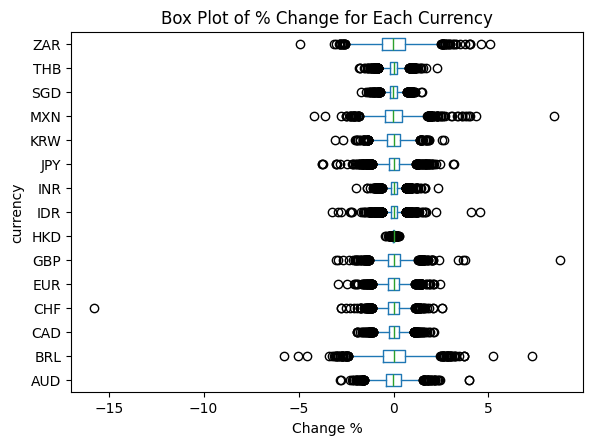

In [31]:
plt.figure(figsize=(12, 6))
df_forex.boxplot(column="Change %", by="currency", vert=False, grid=False)
plt.xlabel("Change %")
plt.title("Box Plot of % Change for Each Currency")
plt.suptitle("")  # Remove default suptitle
plt.show()

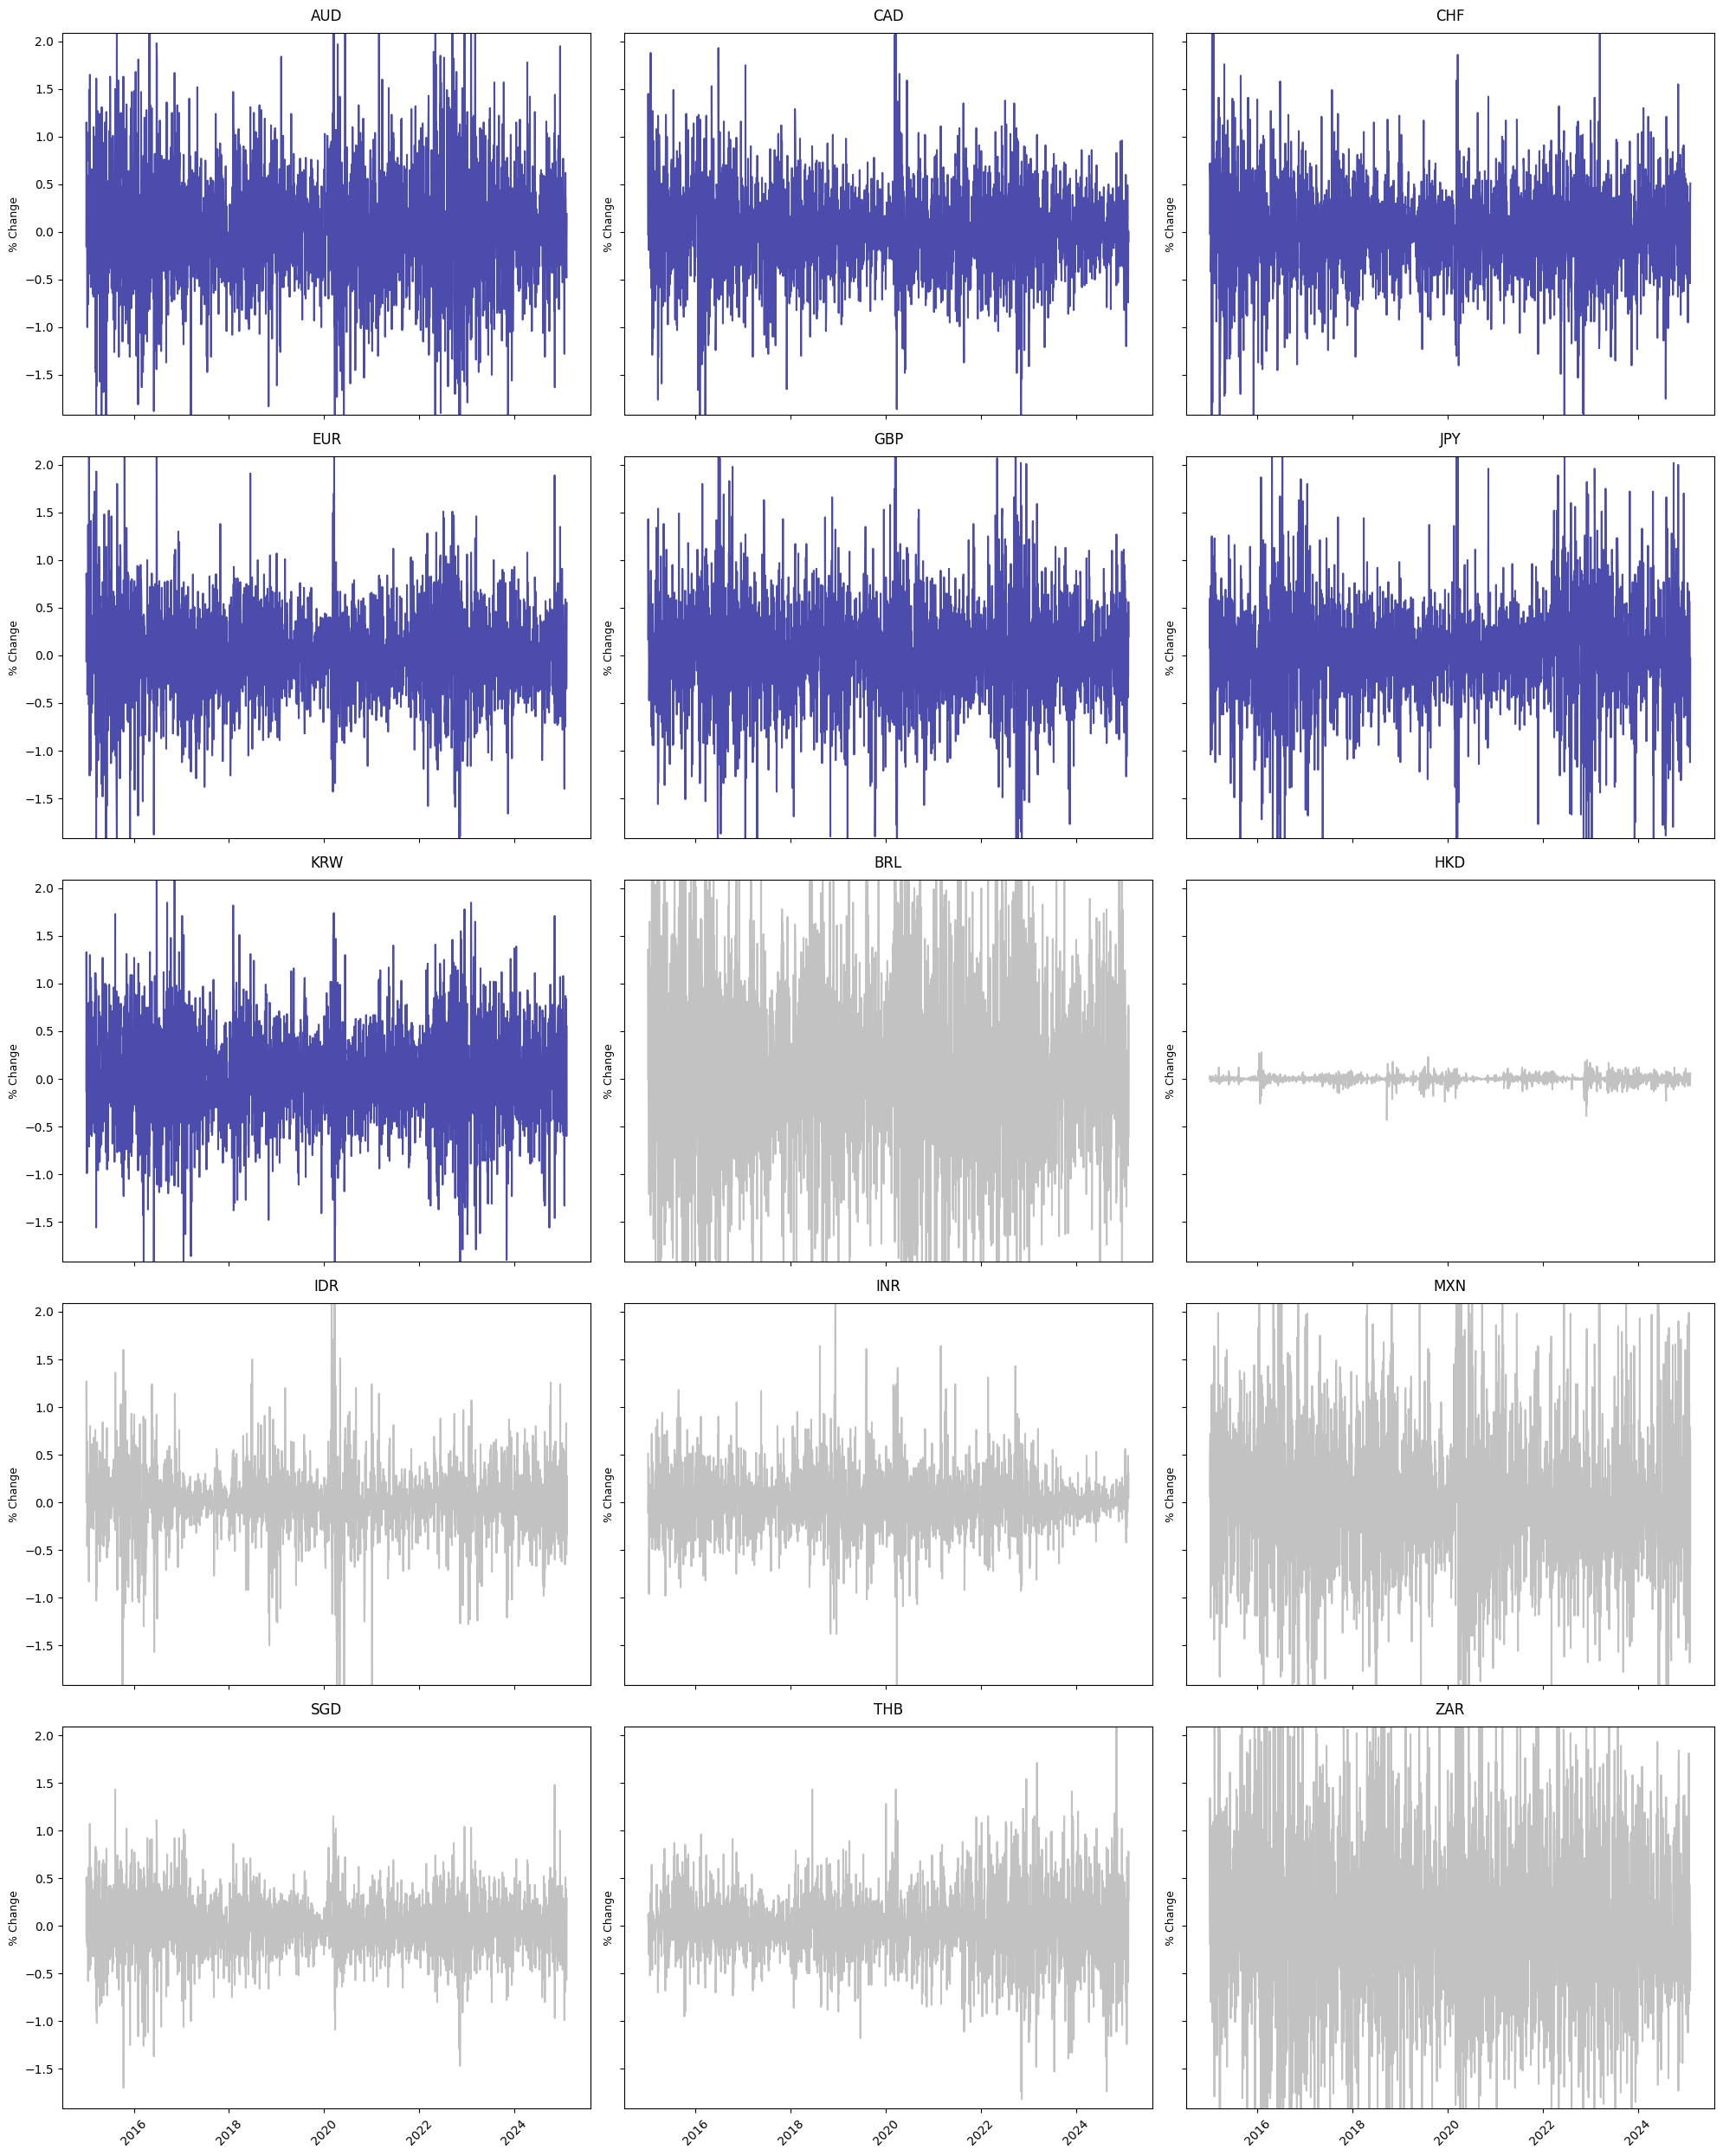

In [32]:
import matplotlib.dates as mdates

# Ensure proper formatting
df_forex["Date"] = pd.to_datetime(df_forex["Date"])
df_forex["Change %"] = pd.to_numeric(
    df_forex["Change %"].astype(str).str.replace("%", "", regex=False), errors="coerce"
)

# Compute axis limits
y_min, y_max = df_forex["Change %"].quantile(0.005), df_forex["Change %"].quantile(
    0.995
)

# Get ordered currencies with Developed first
status_order = {"Developed": 0, "Developing": 1}  # Add other statuses if needed
sorted_currencies = (
    df_forex.drop_duplicates("currency")
    .sort_values("development_status", key=lambda x: x.map(status_order))["currency"]
    .tolist()
)

# Create 5x3 grid
fig, axes = plt.subplots(5, 3, figsize=(20, 25), sharex=True, sharey=True)
axes = axes.flatten()

# Plotting loop
for idx, currency in enumerate(sorted_currencies):
    if idx >= len(axes):
        break

    ax = axes[idx]
    df_currency = df_forex[df_forex["currency"] == currency].sort_values("Date")

    # Style parameters
    status = df_currency["development_status"].iloc[0]
    line_color = "darkblue" if status == "Developed" else "darkgrey"

    # Create plot
    ax.plot(
        df_currency["Date"],
        df_currency["Change %"],
        color=line_color,
        alpha=0.7,
        linewidth=1.5,
    )

    # Format axes
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.tick_params(axis="x", rotation=45)
    ax.set_ylim(y_min, y_max)

    # Labels
    ax.set_title(currency, fontsize=12, pad=10)
    ax.set_ylabel("% Change", fontsize=9)

plt.tight_layout()
plt.show()

In [33]:
df_forex.head(10)

,Date,Price,Open,High,Low,Vol.,Change %,currency,country,development_status,currency_pair,volatility
0,2025-02-07,1.5944,1.5924,1.5993,1.5874,NaN,0.19,AUD,Australia,Developed,USD/AUD,0.747300
1,2025-02-06,1.5913,1.5911,1.5990,1.5900,NaN,0.03,AUD,Australia,Developed,USD/AUD,0.565646
2,2025-02-05,1.5908,1.6000,1.6027,1.5878,NaN,-0.48,AUD,Australia,Developed,USD/AUD,0.931250
3,2025-02-04,1.5985,1.6063,1.6209,1.5966,NaN,-0.45,AUD,Australia,Developed,USD/AUD,1.512793
4,2025-02-03,1.6057,1.6102,1.6430,1.6031,NaN,-0.24,AUD,Australia,Developed,USD/AUD,2.477953
5,2025-01-31,1.6095,1.6105,1.6124,1.5966,NaN,-0.03,AUD,Australia,Developed,USD/AUD,0.981062
6,2025-01-30,1.61,1.6053,1.6132,1.6013,NaN,0.35,AUD,Australia,Developed,USD/AUD,0.741294
7,2025-01-29,1.6044,1.5991,1.6104,1.5984,NaN,0.36,AUD,Australia,Developed,USD/AUD,0.750422
8,2025-01-28,1.5987,1.5892,1.6035,1.5887,NaN,0.62,AUD,Australia,Developed,USD/AUD,0.931286
9,2025-01-27,1.5888,1.5821,1.5938,1.5813,NaN,0.32,AUD,Australia,Developed,USD/AUD,0.790089


In [34]:
tweets = pd.read_csv(r"trump_datasets/foreign_policy_df.csv")
tweets["foreign_policy_category"].value_counts()

foreign_policy_category
Geopolitics       2878
War                467
Deals              380
Diplomacy          279
Uncategorized      262
Tariffs            151
Security           106
Sanctions           61
Energy Policy       42
Human Rights        23
Nuclear Policy      22
Name: count, dtype: int64

In [35]:
tweets["foreign_policy_category"].value_counts()
# Adding Deals, Sanctions, Tariifs
# deals = tweets[tweets['foreign_policy_category'] == 'Deals']
# deals

tweet_treatment = tweets[
    tweets["foreign_policy_category"].isin(["Deals", "Tariffs", "Sanctions"])
].copy()
tweet_treatment

,Unnamed: 0,text,date,foreign_policy,foreign_policy_category,topic,cluster
5,72,The Senate should immediately vote on the Iran...,2014-01-15 19:04:00,Foreign Policy,Deals,8,6
47,529,Why did Pres Obama remove sanctions against Ir...,2014-04-18 15:51:00,Foreign Policy,Deals,1,6
53,576,South Korea is absolutely killing us on trade ...,2014-04-24 11:13:00,Foreign Policy,Deals,4,1
54,584,N.Y.Times headline states Obama suffers setbac...,2014-04-25 10:43:00,Foreign Policy,Deals,9,8
55,585,We allow Japan to sell us millions of cars wit...,2014-04-25 11:15:00,Foreign Policy,Tariffs,4,8
...,...,...,...,...,...,...,...
4551,37965,So when are they going to release the details ...,08/01/2024 13:33,Foreign Policy,Deals,6,3
4555,37988,"Crazy Kamala is saying she’s Indian, not Black...",07/31/2024 16:41,Foreign Policy,Deals,4,8
4556,37995,Crazy Kamala Harris should never have taken th...,07/31/2024 14:12,Foreign Policy,Deals,5,8
4619,38761,“Dollar and euro trade halted on Russia’s bigg...,06/18/2024 21:34,Foreign Policy,Deals,0,8


In [36]:
tweet_treatment = tweet_treatment[["date", "foreign_policy_category"]]

print(tweet_treatment.shape)
tweet_treatment["date"] = pd.to_datetime(tweet_treatment["date"], errors="coerce")
tweet_treatment["day_of_week"] = tweet_treatment["date"].dt.day_name()
print(tweet_treatment.shape)


# add 1 to date if sunday, 2 if saturday
# Shift dates for weekend tweets
tweet_treatment["date"] += (
    tweet_treatment["day_of_week"]
    .map({"Sunday": pd.Timedelta(days=1), "Saturday": pd.Timedelta(days=2)})
    .fillna(pd.Timedelta(days=0))
)

(592, 2)
(592, 3)


/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_68208/3436067783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_treatment["date"] = pd.to_datetime(tweet_treatment["date"], errors="coerce")
/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_68208/3436067783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_treatment["day_of_week"] = tweet_treatment["date"].dt.day_name()
/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_68208/3436067783.py:11: SettingWithCopyWarn

In [37]:
tweet_treatment = tweet_treatment[["date", "foreign_policy_category"]]

In [38]:
# Clean time before merge
tweet_treatment["date"] = tweet_treatment["date"].dt.strftime("%Y-%m-%d")
df_forex["Date"] = df_forex["Date"].dt.strftime("%Y-%m-%d")


merge = pd.merge(
    df_forex,
    tweet_treatment,
    how="left",
    left_on="Date",
    right_on="date",
    indicator=True,
)

merge
# Left only means that the tweet date is not in the forex data

,Date,Price,Open,High,Low,Vol.,Change %,currency,country,development_status,currency_pair,volatility,date,foreign_policy_category,_merge
0,2025-02-07,1.5944,1.5924,1.5993,1.5874,NaN,0.19,AUD,Australia,Developed,USD/AUD,0.747300,NaN,NaN,left_only
1,2025-02-06,1.5913,1.5911,1.5990,1.5900,NaN,0.03,AUD,Australia,Developed,USD/AUD,0.565646,NaN,NaN,left_only
2,2025-02-05,1.5908,1.6000,1.6027,1.5878,NaN,-0.48,AUD,Australia,Developed,USD/AUD,0.931250,NaN,NaN,left_only
3,2025-02-04,1.5985,1.6063,1.6209,1.5966,NaN,-0.45,AUD,Australia,Developed,USD/AUD,1.512793,NaN,NaN,left_only
4,2025-02-03,1.6057,1.6102,1.6430,1.6031,NaN,-0.24,AUD,Australia,Developed,USD/AUD,2.477953,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42837,2015-01-07,11.6738,11.7180,11.7503,11.6750,NaN,-0.32,ZAR,South Africa,Developing,USD/ZAR,0.642601,NaN,NaN,left_only
42838,2015-01-06,11.711,11.7080,11.7853,11.6615,NaN,0.07,ZAR,South Africa,Developing,USD/ZAR,1.057397,NaN,NaN,left_only
42839,2015-01-05,11.703,11.7350,11.7572,11.6731,NaN,0.03,ZAR,South Africa,Developing,USD/ZAR,0.716660,NaN,NaN,left_only
42840,2015-01-02,11.699,11.5526,11.7393,11.5476,NaN,1.34,ZAR,South Africa,Developing,USD/ZAR,1.659367,NaN,NaN,left_only


In [39]:
merge["_merge"].value_counts()

_merge
left_only     34450
both           8392
right_only        0
Name: count, dtype: int64

In [40]:
merge = merge[
    [
        "Date",
        "foreign_policy_category",
        "High",
        "Low",
        "currency",
        "country",
        "development_status",
        "_merge",
    ]
]

# Let's make HIgh and Low numeric first
merge["High"] = pd.to_numeric(merge["High"], errors="coerce")
merge["Low"] = pd.to_numeric(merge["Low"], errors="coerce")

# Make sure high and low contain values
merge = merge[merge["High"].notna() & merge["Low"].notna()]

merge["volatility_percentage_change"] = (
    (merge["High"] - merge["Low"]) / merge["Low"] * 100
)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_68208/1902405706.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge["High"] = pd.to_numeric(merge["High"], errors="coerce")
/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_68208/1902405706.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge["Low"] = pd.to_numeric(merge["Low"], errors="coerce")


In [41]:
merge["Date"].nunique()

2637

In [42]:
no_tarriff = merge[merge["_merge"] == "left_only"]

no_tarriff["Date"].nunique()

2300

In [43]:
tariff_group = merge[merge["_merge"] == "both"]

tariff_group["Date"].nunique()

337

In [44]:
merge

,Date,foreign_policy_category,High,Low,currency,country,development_status,_merge,volatility_percentage_change
0,2025-02-07,NaN,1.5993,1.5874,AUD,Australia,Developed,left_only,0.749654
1,2025-02-06,NaN,1.5990,1.5900,AUD,Australia,Developed,left_only,0.566038
2,2025-02-05,NaN,1.6027,1.5878,AUD,Australia,Developed,left_only,0.938405
3,2025-02-04,NaN,1.6209,1.5966,AUD,Australia,Developed,left_only,1.521984
4,2025-02-03,NaN,1.6430,1.6031,AUD,Australia,Developed,left_only,2.488928
...,...,...,...,...,...,...,...,...,...
42837,2015-01-07,NaN,11.7503,11.6750,ZAR,South Africa,Developing,left_only,0.644968
42838,2015-01-06,NaN,11.7853,11.6615,ZAR,South Africa,Developing,left_only,1.061613
42839,2015-01-05,NaN,11.7572,11.6731,ZAR,South Africa,Developing,left_only,0.720460
42840,2015-01-02,NaN,11.7393,11.5476,ZAR,South Africa,Developing,left_only,1.660085


In [45]:
# IMport ttest
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.multitest as smm

In [46]:
#

In [47]:
no_tarriff["Group"] = "Control"
no_tarriff_subset = no_tarriff[
    ["Date", "currency", "volatility_percentage_change", "Group"]
]

tariff_group["Group"] = "Treatment"
tariff_group_subset = tariff_group[
    ["Date", "currency", "volatility_percentage_change", "Group"]
]

# concatenate
combined = (
    pd.concat([no_tarriff_subset, tariff_group_subset])
    .sort_values(by="Date")
    .reset_index()
)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_68208/3314012213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_tarriff["Group"] = "Control"
/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_68208/3314012213.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tariff_group["Group"] = "Treatment"


In [48]:
combined.head(100)

,index,Date,currency,volatility_percentage_change,Group
0,28541,2015-01-01,JPY,0.175497,Control
1,5719,2015-01-01,BRL,0.000000,Control
2,34261,2015-01-01,MXN,0.030501,Control
3,25681,2015-01-01,INR,0.443213,Control
4,42841,2015-01-01,ZAR,0.316305,Control
...,...,...,...,...,...
95,28534,2015-01-12,JPY,1.041490,Control
96,8572,2015-01-12,CAD,1.191381,Control
97,39974,2015-01-12,THB,0.549618,Control
98,25674,2015-01-12,INR,0.467252,Control


In [49]:
combined = combined[combined["volatility_percentage_change"] > 0]

In [50]:
# filtered_combined = combined[combined["Group"] == "Control"]
# filtered_combined = filtered_combined[filtered_combined["Date"] < "2021-01-01"]

# filtered_combined = filtered_combined[filtered_combined["Date"] > "2017-01-01"]


# unique_dates = filtered_combined["Date"].dropna().unique()

# # Step 2: Randomly sample 241 of those dates
# sampled_dates = pd.Series(unique_dates).sample(n=241, random_state=42)

# filtered_combined = filtered_combined[filtered_combined["Date"].isin(sampled_dates)]

# combined = combined[combined["Group"] == "Treatment"]

# combined = pd.concat([combined, filtered_combined]).sort_values(by="Date").reset_index()

In [51]:
# Make chart of time series vs volatility for Control mean volatility and Treatment mean volatility

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date is datetime
combined["Date"] = pd.to_datetime(combined["Date"])

# Only give days before 2021
combined = combined[combined["Date"] < "2021-01-01"]

# Only Give results after 2018
combined = combined[combined["Date"] > "2017-01-01"]


# # Group by date and group to get mean volatility per day per group
# daily_mean_vol = (
#     combined.groupby(["Date", "Group"])["volatility_percentage_change"]
#     .mean()
#     .reset_index()
# )

# # Plotting
# plt.figure(figsize=(12, 6))
# sns.lineplot(
#     data=daily_mean_vol, x="Date", y="volatility_percentage_change", hue="Group"
# )
# plt.title("Daily Mean Volatility by Group")
# plt.xlabel("Date")
# plt.ylabel("Mean Volatility (%)")
# plt.legend(title="Group")
# plt.tight_layout()
# plt.show()

In [52]:
# mean_treatment_value = combined[combined["Group"] == "Treatment"][
#     "volatility_percentage_change"
# ].mean()
# mean_control_value = combined[combined["Group"] == "Control"][
#     "volatility_percentage_change"
# ].mean()

# print(f"Mean Treatment Value: {mean_treatment_value}")
# print(f"Mean Control Value: {mean_control_value}")

In [53]:
# n_obs_treat_before_2018 = combined[combined["Group"] == "Treatment"]
# n_obs_treat_before_2018 = n_obs_treat_before_2018[
#     n_obs_treat_before_2018["Date"] < "2018-01-01"
# ].shape[0]

# n_obs_treat_after_2018 = combined[combined["Group"] == "Treatment"]
# n_obs_treat_after_2018 = n_obs_treat_after_2018[
#     n_obs_treat_after_2018["Date"] >= "2018-01-01"
# ].shape[0]

# print(
#     f"Number of observations in Treatment group before 2018: {n_obs_treat_before_2018}"
# )
# print(f"Number of observations in Treatment group after 2018: {n_obs_treat_after_2018}")

In [54]:
# Treatment = combined[combined["Group"] == "Treatment"].nunique()["Date"]
# Control = combined[combined["Group"] == "Control"].nunique()["Date"]
# print(f"Number of unique dates in Treatment group: {Treatment}")
# print(f"Number of unique dates in Control group: {Control}")


# # LEt's sample just 240 random dates in control group

In [55]:
import pandas as pd

# Load your Trump tweets dataset
tweets = pd.read_csv("trump_datasets/foreign_policy_df.csv")

# Convert 'date' column to datetime format
tweets["date"] = pd.to_datetime(tweets["date"], errors="coerce")

# Filter for tweets between Jan 1, 2016 and Jan 20, 2021 (inauguration day)
tweets = tweets[(tweets["date"] >= "2016-01-01") & (tweets["date"] < "2021-01-20")]

# Create a set of all tweet dates (day-only)
tweet_days = set(tweets["date"].dt.date)

# Create a full range of dates during his presidency
all_days = pd.date_range(start="2016-01-01", end="2021-01-19", freq="D")
all_days_set = set(all_days.date)

# Get the difference: days with NO tweets
no_tweet_days = sorted(all_days_set - tweet_days)

# Convert to DataFrame
no_tweet_days_df = pd.DataFrame(no_tweet_days, columns=["no_tweet_date"])

# Preview
print(no_tweet_days_df.head())

  no_tweet_date
0    2016-01-01
1    2016-01-04
2    2016-01-05
3    2016-01-08
4    2016-01-09


In [56]:
combined.columns

Index(['index', 'Date', 'currency', 'volatility_percentage_change', 'Group'], dtype='object')

In [57]:
# Get the max and min date from combined

min_date = combined["Date"].min()
max_date = combined["Date"].max()

print(f"Min date: {min_date}")
print(f"Max date: {max_date}")

Min date: 2017-01-02 00:00:00
Max date: 2020-12-31 00:00:00


In [58]:
events = pd.read_csv("datasets/events.csv")
events

,Date,Time Period,Economic Events
0,1/1/2017,NaN,NaN
1,1/2/2017,NaN,NaN
2,1/3/2017,NaN,NaN
3,1/4/2017,NaN,NaN
4,1/5/2017,NaN,NaN
...,...,...,...
1461,1/1/2021,ELECTION,NaN
1462,1/2/2021,ELECTION,NaN
1463,1/3/2021,ELECTION,NaN
1464,1/4/2021,ELECTION,NaN


In [59]:
combined["Date"] = pd.to_datetime(combined["Date"]).dt.date
combined["Date"] = pd.to_datetime(combined["Date"]).dt.strftime("%m/%d/%Y")
combined.head()

,index,Date,currency,volatility_percentage_change,Group
6955,28006,01/02/2017,JPY,0.813774,Control
6956,33726,01/02/2017,MXN,0.435695,Control
6957,25146,01/02/2017,INR,0.478603,Control
6958,10904,01/02/2017,CHF,0.757203,Control
6959,8044,01/02/2017,CAD,0.500448,Control


In [60]:
# Force both to datetime, which solves string formatting inconsistencies
combined["Date"] = pd.to_datetime(combined["Date"], format="%m/%d/%Y")
events["Date"] = pd.to_datetime(events["Date"], format="%m/%d/%Y")

# Then merge
new_combined = pd.merge(combined, events, how="left", on="Date")
new_combined = pd.merge(combined, events, how="left", left_on="Date", right_on="Date")

new_combined["Time Period"].value_counts()

Time Period
International Tariffs    1286
COVID Lockdown            478
ELECTION                  102
taxcut                     91
Name: count, dtype: int64

In [61]:
new_combined["Economic Events"].value_counts()

Economic Events
Fed Hikes Rates    452
Fed Cut Rates      286
Name: count, dtype: int64

In [62]:
new_combined.columns

Index(['index', 'Date', 'currency', 'volatility_percentage_change', 'Group',
       'Time Period', 'Economic Events'],
      dtype='object')

In [63]:
new_combined.head(5)

,index,Date,currency,volatility_percentage_change,Group,Time Period,Economic Events
0,28006,2017-01-02,JPY,0.813774,Control,NaN,NaN
1,33726,2017-01-02,MXN,0.435695,Control,NaN,NaN
2,25146,2017-01-02,INR,0.478603,Control,NaN,NaN
3,10904,2017-01-02,CHF,0.757203,Control,NaN,NaN
4,8044,2017-01-02,CAD,0.500448,Control,NaN,NaN


In [64]:
new_combined.shape

(16259, 7)

In [65]:
import pandas as pd
from datetime import timedelta

# Ensure datetime format
new_combined["Date"] = pd.to_datetime(new_combined["Date"])

# Add a weekday column: Monday=0, ..., Friday=4
new_combined["weekday"] = new_combined["Date"].dt.weekday

# Split treated and control
treated = new_combined[new_combined["Group"] == "Treatment"].copy()
control = new_combined[new_combined["Group"] == "Control"].copy()

# Fill missing values with 'NA_EVENT' for flexible matching
treated[["Time Period", "Economic Events"]] = treated[
    ["Time Period", "Economic Events"]
].fillna("NA_EVENT")
control[["Time Period", "Economic Events"]] = control[
    ["Time Period", "Economic Events"]
].fillna("NA_EVENT")

matched_rows = []

for _, t_row in treated.iterrows():
    # Step 1: Currency match
    potential_matches = control[control["currency"] == t_row["currency"]]

    # Step 2: Flexible match on time period and economic events
    time_match = (
        (potential_matches["Time Period"] == t_row["Time Period"])
        | (potential_matches["Time Period"] == "NA_EVENT")
        | (t_row["Time Period"] == "NA_EVENT")
    )
    event_match = (
        (potential_matches["Economic Events"] == t_row["Economic Events"])
        | (potential_matches["Economic Events"] == "NA_EVENT")
        | (t_row["Economic Events"] == "NA_EVENT")
    )

    potential_matches = potential_matches[time_match & event_match]

    if potential_matches.empty:
        continue  # Skip if no good matches at all

    # Step 3: Try to match on the same weekday first
    weekday_matches = potential_matches[
        potential_matches["weekday"] == t_row["weekday"]
    ]

    if not weekday_matches.empty:
        pool = weekday_matches
    else:
        # fallback to relaxed match
        pool = potential_matches

    # Step 4: Find closest control date
    pool = pool.copy()
    pool["date_diff"] = (pool["Date"] - t_row["Date"]).abs()
    best_match = pool.loc[pool["date_diff"].idxmin()]

    matched_rows.append(
        {
            "currency": t_row["currency"],
            "Date_treated": t_row["Date"],
            "volatility_treated": t_row["volatility_percentage_change"],
            "Date_control": best_match["Date"],
            "volatility_control": best_match["volatility_percentage_change"],
            "Time Period (Treated)": t_row["Time Period"],
            "Time Period (Control)": best_match["Time Period"],
            "Economic Events (Treated)": t_row["Economic Events"],
            "Economic Events (Control)": best_match["Economic Events"],
            "Weekday": t_row["weekday"],
        }
    )

# Convert to final matched DataFrame
matched_df = pd.DataFrame(matched_rows)

# Preview results
print(f"Matched dataset shape: {matched_df.shape}")
print(matched_df.head())

Matched dataset shape: (6342, 10)
  currency Date_treated  volatility_treated Date_control  volatility_control  \
0      BRL   2017-01-11            1.680725   2017-01-04            1.305133   
1      CAD   2017-01-11            1.341463   2017-01-04            1.332631   
2      SGD   2017-01-11            1.207865   2017-01-04            0.862009   
3      ZAR   2017-01-11            2.500476   2017-01-04            1.935584   
4      CHF   2017-01-11            1.495050   2017-01-04            0.921569   

  Time Period (Treated) Time Period (Control) Economic Events (Treated)  \
0              NA_EVENT              NA_EVENT                  NA_EVENT   
1              NA_EVENT              NA_EVENT                  NA_EVENT   
2              NA_EVENT              NA_EVENT                  NA_EVENT   
3              NA_EVENT              NA_EVENT                  NA_EVENT   
4              NA_EVENT              NA_EVENT                  NA_EVENT   

  Economic Events (Control)  Weekd

In [66]:
currency_dic = {
    "EUR": 0.3370026895548272,
    "JPY": 0.18415367205067532,
    "GBP": 0.14241413265531075,
    "AUD": 0.07039873017739304,
    "CAD": 0.06848811745859114,
    "CHF": 0.05731838156405696,
    "HKD": 0.028512220572889872,
    "SGD": 0.02689554827236519,
    "KRW": 0.02086976969768228,
    "INR": 0.017930365514910125,
    "MXN": 0.016769300862715126,
    "ZAR": 0.010728825267118354,
    "BRL": 0.009700033803148102,
    "THB": 0.004556076483296836,
    "IDR": 0.0042621360650196205,
}

## Added for analysis of t-test

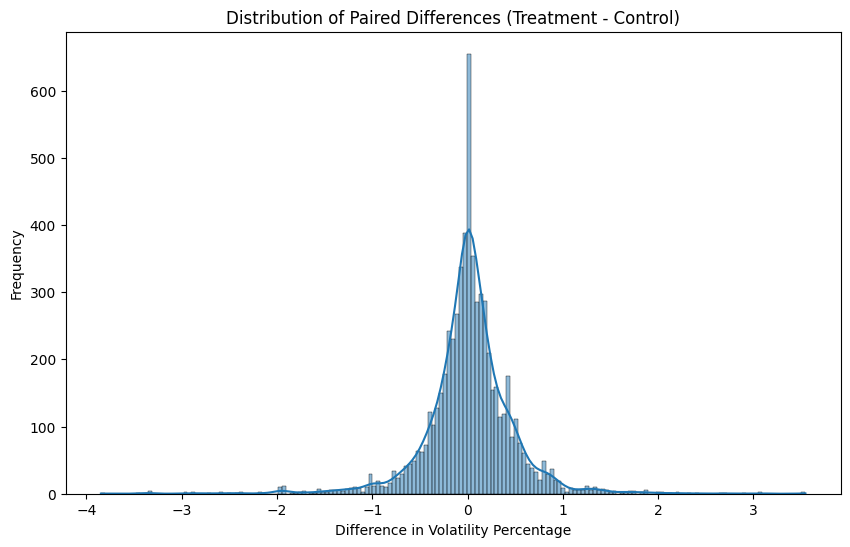

In [ ]:
# Calculate paired differences
matched_df["difference"] = (
    matched_df["volatility_treated"] - matched_df["volatility_control"]
)

# Plot histogram of differences
plt.figure(figsize=(10, 6))
sns.histplot(matched_df["difference"], kde=True)
plt.title("Distribution of Paired Differences (Treatment - Control)")
plt.xlabel("Difference in Volatility Percentage")
plt.ylabel("Frequency")
plt.show()

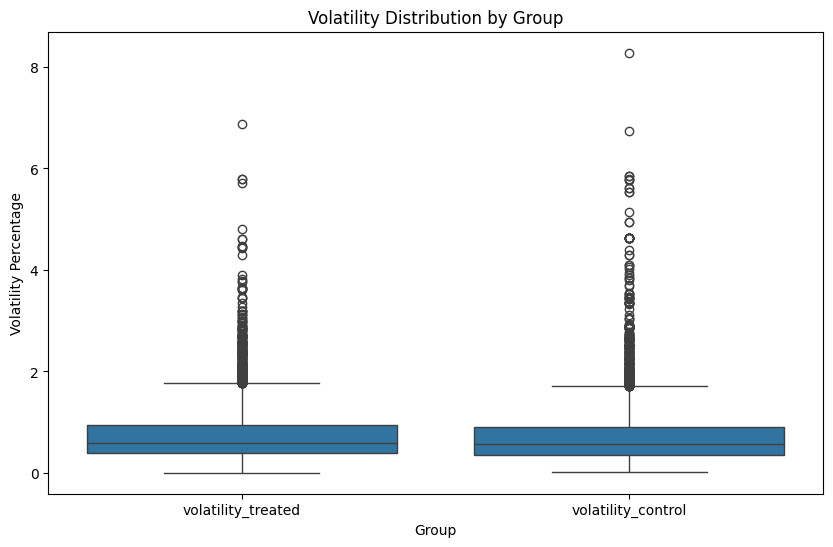

Levene's test p-value: 0.7288865670101732


In [ ]:
# Boxplot of volatility by group
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=pd.melt(matched_df[["volatility_treated", "volatility_control"]]).rename(
        columns={"volatility_treated": "Treatment", "volatility_control": "Control"}
    ),
    x="variable",
    y="value",
)
plt.title("Volatility Distribution by Group")
plt.xlabel("Group")
plt.ylabel("Volatility Percentage")
plt.show()

# Levene's test for equal variances
from scipy.stats import levene

levene_test = levene(matched_df["volatility_treated"], matched_df["volatility_control"])
print(f"Levene's test p-value: {levene_test.pvalue}")

In [ ]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(
    matched_df["volatility_treated"], matched_df["volatility_control"]
)
print(f"Paired t-test results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Effect size (Cohen's d)
mean_diff = matched_df["difference"].mean()
std_diff = matched_df["difference"].std()
cohens_d = mean_diff / std_diff
print(f"Cohen's d effect size: {cohens_d:.4f}")

Paired t-test results:
T-statistic: 3.2959
P-value: 0.0010
Cohen's d effect size: 0.0414
